In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
%matplotlib inline

In [2]:
# import the data 
data = pd.read_csv("heart.csv")
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [3]:
# lets find the row and columns
data.shape

(1025, 14)

In [4]:
# identify all the columns because it will help us to understand
# and clean the data 
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# cleaning the data
# first finding that the data type of each columns
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# all the columns have integer type data except oldpeak which has float 
# data type.

In [7]:
# now lets finding the unique values of  each columns
data.nunique() #it will show the unique values of all columns 

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
#  now checking and finding the null value 
#  once find then we will replace them or drop them depand on the 
#  the data .
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## check the duplicate values 

In [10]:
data.duplicated().sum()

723

it show that the data have near 70% duplicated data

In [11]:
# data[data.duplicated(keep=False)]

## Statistics

In [12]:
# now find the basic stats by using the describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# if target has value 0 mean no disease if 1 than disease 
# let replace them by disease and no disease
target = {1:"Heart Disease", 0 : "No Heart Disease"}
data.target= data.target.replace(target)

# also change for gender if 0 mean female if 1 mean male 
gender= {0:"Female", 1:"Male"}
data.sex= data.sex.replace(gender)
# data.head(2)
data.shape

(1025, 14)

# visualization


In [14]:
# disease and no disease
disease = data[data.target=="Heart Disease"].count().target
no_disease = data[data.target=="No Heart Disease"].count().target

# plt.show()

In [15]:
no_disease ,disease

(499, 526)

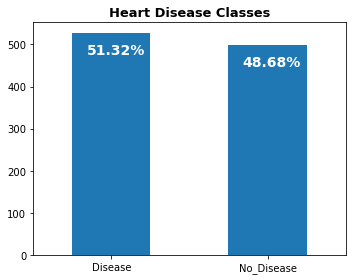

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = data.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

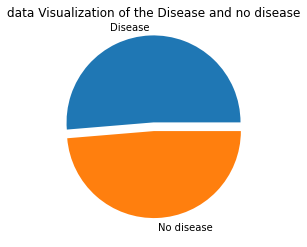

In [17]:
plt.title("data Visualization of the Disease and no disease")
plt.pie([disease, no_disease], labels= ["Disease", "No disease"], explode=[0.1, 0])
plt.show()

In [18]:
# separate the disease and no disease 
affect = data[data.target=='Heart Disease']
no_affect = data[data.target=="No Heart Disease"]


In [19]:
# affect by gender
# affect male and female
male = affect[affect.sex=="Male"].count().sex
female = affect[affect.sex=="Female"].count().sex

# non affect male and female
Male = no_affect[no_affect.sex=="Male"].count().sex
Female = no_affect[no_affect.sex=="Female"].count().sex

## visualizing by gender the heart disease

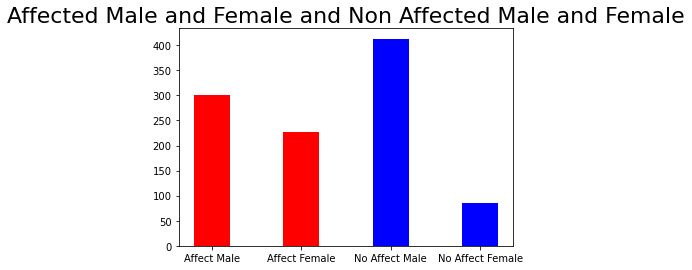

In [20]:
plt.bar(["Affect Male","Affect Female", "No Affect Male", "No Affect Female"]
        ,[male, female, Male, Female],
        color=('red','red', 'blue', 'blue'), width=0.4)
plt.title("Affected Male and Female and Non Affected Male and Female",
         fontsize=22)
plt.show()

## Chist pain in the Heart Disease

Text(0.5, 1.0, 'Heart Disorder and Chest Pain')

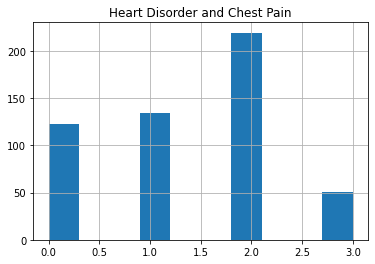

In [21]:

affect.cp.hist().plot()
plt.title("Heart Disorder and Chest Pain")

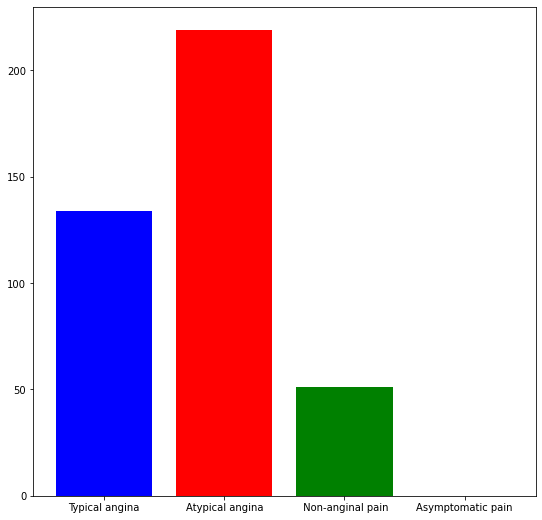

In [27]:

typical = affect[affect.cp==1].count().cp
atypical =affect[affect.cp==2].count().cp
non_anginal = affect[affect.cp==3].count().cp
asymptomatic = affect[affect.cp==4].count().cp
plt.figure(figsize=(9,9))
plt.bar(["Typical angina","Atypical angina", " Non-anginal pain", "Asymptomatic pain"],
        [typical,atypical,non_anginal,asymptomatic],
       color=['blue','red', 'green', 'green'])
plt.show()

### affect people by age

Text(0.5, 1.0, 'Age Distribution')

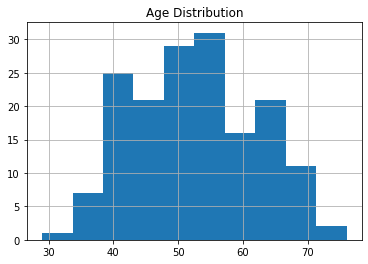

In [208]:
affect['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

Text(0, 0.5, 'Age distribution')

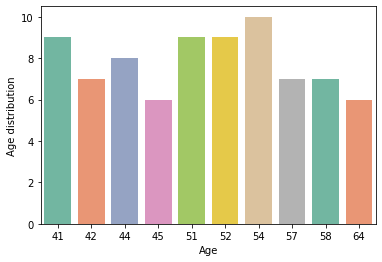

In [209]:
# visualizing with more detail to find the age in which more people has heart disease
sns.barplot(x=affect.age.value_counts()[:10].index,
y=affect.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [210]:
# it show that there is little difference

#### now by age

##  Fasting blood sugar  of affected and un affected

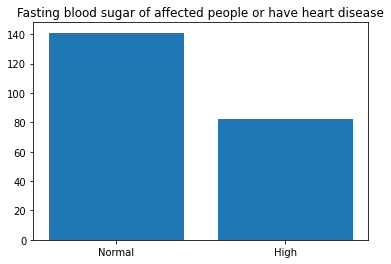

In [211]:
high = affect[affect.fbs==1].count().fbs
low = affect[affect.fbs==0].count().fbs

high, low


plt.bar(["Normal", "High"], [low, High])
plt.title("Fasting blood sugar of affected people or have heart disease")
plt.show()

# thalach (maximum heart rate achieved)

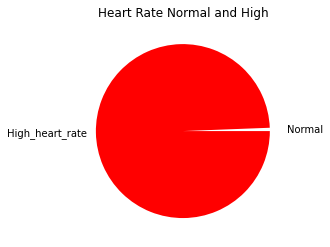

In [212]:
# 60 to 100 beats per minute.
normal = affect[affect.thalach<=100].count().thalach;
normal
high_heart_rate = affect[affect.thalach>100].count().thalach
high_heart_rate
# visualizing
plt.title("Heart Rate Normal and High")

plt.pie([normal, high_heart_rate], labels= ["Normal", "High_heart_rate"], explode=[0.1, 0], colors=["white","red"])
plt.show()

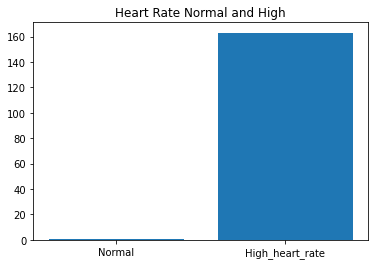

In [213]:
plt.bar(["Normal", "High_heart_rate"],[normal, high_heart_rate])
plt.title("Heart Rate Normal and High")
plt.show()

## trestbps (Resting Blood Pressure in mm/hg )

Text(0.5, 1.0, 'Resting Blood Pressure of Heart Disease')

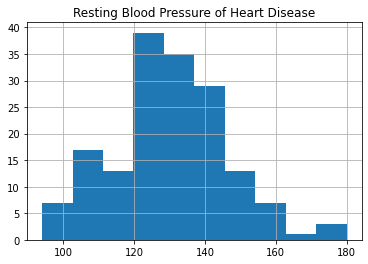

In [214]:
affect['trestbps'].hist().plot(kind='bar')
plt.title('Resting Blood Pressure of Heart Disease')

## oldpeak (ST depression induced by exercise relative to rest)

Text(0.5, 1.0, 'Old Peak of Heart Disease')

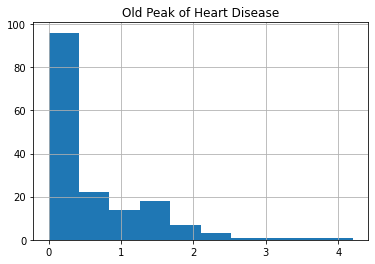

In [215]:
affect['oldpeak'].hist().plot(kind='bar')
plt.title('Old Peak of Heart Disease')

## chol (Serum Cholesterol ) 

Text(0.5, 1.0, 'Cholesterol of Heart Disease')

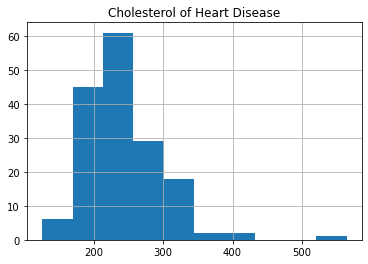

In [216]:
affect['chol'].hist().plot(kind='bar')
plt.title('Cholesterol of Heart Disease')

Text(0.5, 1.0, 'Old Peak of Heart Disease')

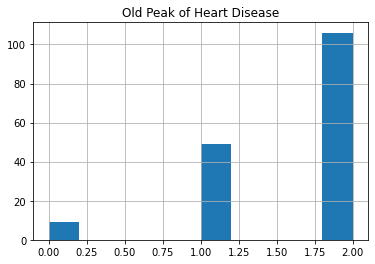

In [217]:
affect['slope'].hist().plot(kind='bar')
plt.title('Old Peak of Heart Disease')

In [218]:
affect.slope.unique()

array([1, 2, 0], dtype=int64)

In [219]:
affect.restecg.unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Old Peak of Heart Disease')

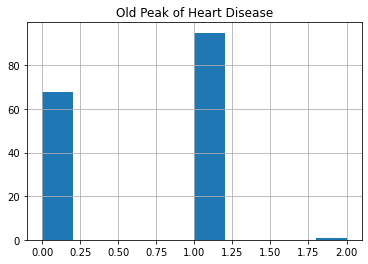

In [220]:
a=affect['restecg'].hist().plot(kind='bar')
plt.title('Old Peak of Heart Disease')

In [228]:
# before train the model i remove the duplication of data from dataset because it can affect the accuracy
data= data.drop_duplicates()
data.shape


(302, 14)

# Train the Model

In [29]:
gender= {"Female":0, "Male":1}
data.sex= data.sex.replace(gender)

In [50]:
x = data.drop("target", axis=1)
y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Logistic Regression Classifier

In [51]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [52]:
#Building classification models
names = ['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trestbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trestbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))


Accuracy of logistic regression classifier ::  0.8181818181818182
nAccuracy of logistic regression classifier after removing features::  0.8214285714285714


In [53]:
# save the model
import joblib # to save and load the model
joblib.dump(y_pred_logReg1, "train.joblib")


['train.joblib']